ChEn-3170: Computational Methods in Chemical Engineering Fall 2021 UMass Lowell; Prof. V. F. de Almeida **25Oct20**

# 09. Rank-Deficient Least-Squares Reaction Rates
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Introduction](#intro)
* [Rank-Deficient Reaction mechanism](#rankdefrxnmech)
* [Rank-Deficient Mininum Norm (shortest) Least-Squares Reaction Rate Solution](#rankdefmnls)
* [Full-Rank Reaction mechanism](#fullrankrxnmech)
* [Full-Rank Mininum Norm (shortest) Least-Squares Reaction Rate Solution](#fullrankmnls)
---

## [Introduction](#toc)<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-stoic](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EqzmKLDRWxRDj8qWeZ4ynvYBpPkRrD6rxdRovqD7bR-bhQ?e=pnmM4z) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

When $\Smtrx$ is rank deficient, $\Smtrx\,\Smtrx^\top$ is also rank deficient (or singular). The normal equations 

\begin{equation*}
\boxed{\Smtrx\,\Smtrx^\top\,\rvec_\text{LS}  = \Smtrx\,\gvec },
\end{equation*}

*do not have a unique solution or have no solution*. 

To compute the reaction rates vector $\rvec$ for a given species production vector $\gvec$ we need to solve:

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec .
\end{equation*}

Since $\Smtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\rvec_\text{MNLS}$, exists as follows,

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\rvec \bigl( \norm{\gvec - \Smtrx^\top\,\rvec_\text{MNLS}}^2 + \epsilon\norm{\rvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \rvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Smtrx\,\Smtrx^\top + \epsilon\Imtrx\bigr) \rvec_\text{MNLS}  = \Smtrx\,\gvec },
\end{equation*}

where $\Smtrx\,\Smtrx^\top$ is square, symmetric and rank deficient. The least-squares problem is just $\Amtrx\,\xvec=\bvec$ with
$\Amtrx = \Smtrx\,\Smtrx^\top + \epsilon\Imtrx$ and $\bvec = \Smtrx\,\gvec$. There exists a unique solution to this problem.

## [Rank-Deficient Reaction Mechanism](#toc)<a id="rankdefrxnmech"></a>
Refer to course Notebook 07 for assembling the stoichiometric matrix.

In [1]:
'''Read a reaction mechanism and create data structures'''

try:    
    from chen_3170.toolkit import reaction_mechanism   
except ModuleNotFoundError:
    assert False, 'You need to provide your own reaction_mechanism function here. Bailing out.'

# build the stoichiometric matrix
(species, reactions, stoic_mtrx, dummy, dummy) = reaction_mechanism('data/ammonia-rxn.txt')

print(species,'\n # species =',len(species))
from chen_3170.help import print_reactions
print_reactions(reactions)

['NO2', 'H2O', 'NH3', 'O2', 'N2', 'NO'] 
 # species = 6
r0 :  4 NH3 + 5 O2        <=> 4 NO  + 6 H2O
r1 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r2 :  4 NH3 + 6 NO        <=> 5 N2  + 6 H2O
r3 :  2 NO  + 1 O2        <=> 2 NO2
r4 :  2 NO                <=> 1 N2  + 1 O2
r5 :  1 N2  + 2 O2        <=> 2 NO2
r6 :  4 NH3 + 4 NO + 1 O2 <=> 4 N2  + 6 H2O
n_reactions = 7


matrix shape = (7, 6)


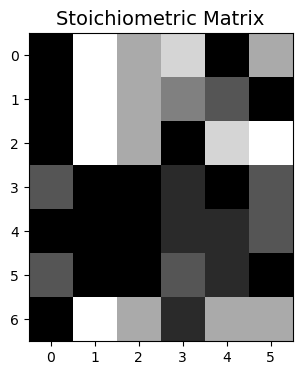

stoic_mtrx=
 [[ 0.  6. -4. -5.  0.  4.]
 [ 0.  6. -4. -3.  2.  0.]
 [ 0.  6. -4.  0.  5. -6.]
 [ 2.  0.  0. -1.  0. -2.]
 [ 0.  0.  0.  1.  1. -2.]
 [ 2.  0.  0. -2. -1.  0.]
 [ 0.  6. -4. -1.  4. -4.]]

mole balance vector =
 [ 1.  1.  1. -1.  0. -1.  1.]


In [2]:
'''Check the stoichiometric matrix'''

from chen_3170.help import plot_matrix

plot_matrix(stoic_mtrx, title='Stoichiometric Matrix')

import numpy as np

np.set_printoptions(precision=3, threshold=100, edgeitems=5, linewidth=100)
print('stoic_mtrx=\n',stoic_mtrx)
print('')
print('mole balance vector =\n', stoic_mtrx.sum(1))

In [3]:
'''Rank of S'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

s_rank = matrix_rank(stoic_mtrx)

print('S shape   = ',stoic_mtrx.shape)
print('Rank of S = ',s_rank)

if s_rank == min(stoic_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')

S shape   =  (7, 6)
Rank of S =  3
Matrix is rank deficient.


## [Rank-Deficient Minimum Norm (shortest) Least-Squares Reaction Rate Solution](#toc)<a id="rankdefmnls"></a>

In [4]:
'''Compute the MNLS reaction rates for a given species production rates'''

import numpy as np

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'
    
from chen_3170.help import forward_solve
try:    
    from chen_3170.toolkit import backward_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

a = -4.2  # mol/s/cc
b =  3.7  # mol/s/cc

g_vec = (b-a)*np.random.random(len(species)) + a # production rates
print('species production rates g_vec =',g_vec)

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2, -6, 10)

np.set_printoptions(precision=4, threshold=100, edgeitems=3, linewidth=100)

r_vec_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    a_mtrx = stoic_mtrx @ stoic_mtrx.transpose() + epsilon * np.eye(len(reactions)) # A = S ST + epsilon I, A is the normal matrix
    b_vec  = stoic_mtrx @ g_vec                    # b = S g

    # matrix LU factorization of A, the normal matrix
    (L, U, P, a_rank) = lu_factorization(a_mtrx, pivoting_option='partial', pivot_tol=1e-6) # matrix is full rank; partial pivoting works
    
    assert a_rank == np.linalg.matrix_rank(a_mtrx)

    # solve the LS problem: A x = b
    y_vec = forward_solve(L, P @ b_vec)   # L y = P b
    x_vec = backward_solve(U, y_vec, diag_tol=1e-6)      # U x = y

    # test my solution against NumPy solve
    print('||x_vec - x_vec_numpy|| = %2.3e'%(np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec))))

    r_vec = x_vec # r = x
    print('reaction rates r_vec =', [round(r,4) for r in list(r_vec)])

    rate_norm = np.linalg.norm(r_vec)
    print('||r|| = %8.5e'%rate_norm)
    
    r_vec_norm_history.append(rate_norm) # save for plotting

    residual_vec = g_vec - stoic_mtrx.transpose() @ r_vec
    print('||g - ST r||^2 + eps*||r||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*rate_norm**2))
    print('||g - ST r|| +       ||r||   = %8.5e'%(np.linalg.norm(residual_vec) + rate_norm))
    print('||g - ST r||                 = %8.5e'%(np.linalg.norm(residual_vec)))

species production rates g_vec = [ 0.481 -1.082 -3.594  2.015 -3.39   2.737]

epsilon = 1.0e+02

||x_vec - x_vec_numpy|| = 2.118e-17
reaction rates r_vec = [0.0693, 0.003, -0.0964, -0.0409, -0.0331, -0.0078, -0.0632]
||r|| = 1.44661e-01
||g - ST r||^2 + eps*||r||^2 = 3.26456e+01
||g - ST r|| +       ||r||   = 5.67213e+00
||g - ST r||                 = 5.52747e+00

epsilon = 1.3e+01

||x_vec - x_vec_numpy|| = 3.264e-16
reaction rates r_vec = [0.1417, 0.0231, -0.1549, -0.1301, -0.0593, -0.0707, -0.0955]
||r|| = 2.81372e-01
||g - ST r||^2 + eps*||r||^2 = 2.92765e+01
||g - ST r|| +       ||r||   = 5.59682e+00
||g - ST r||                 = 5.31545e+00

epsilon = 1.7e+00

||x_vec - x_vec_numpy|| = 1.256e-15
reaction rates r_vec = [0.1636, 0.0308, -0.1683, -0.2034, -0.0664, -0.137, -0.102]
||r|| = 3.61906e-01
||g - ST r||^2 + eps*||r||^2 = 2.81541e+01
||g - ST r|| +       ||r||   = 5.64732e+00
||g - ST r||                 = 5.28542e+00

epsilon = 2.2e-01

||x_vec - x_vec_numpy|| = 1.023e-14


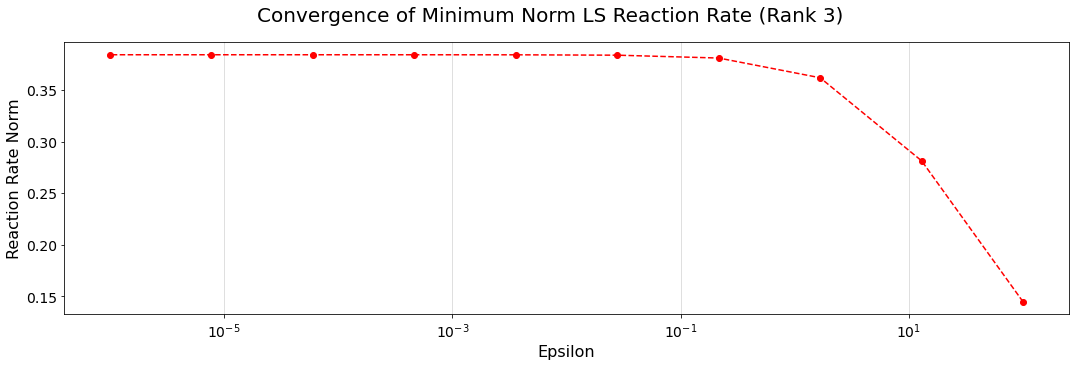

In [5]:
'''Plot Convergence of the Shortest Least-Square Reaction Rate'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(18,5))

ax.semilogx(epsilon_values, r_vec_norm_history,'ro--')

ax.set_ylabel('Reaction Rate Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig.suptitle('Convergence of Minimum Norm LS Reaction Rate (Rank %s)'%str(s_rank), fontsize=20)

ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

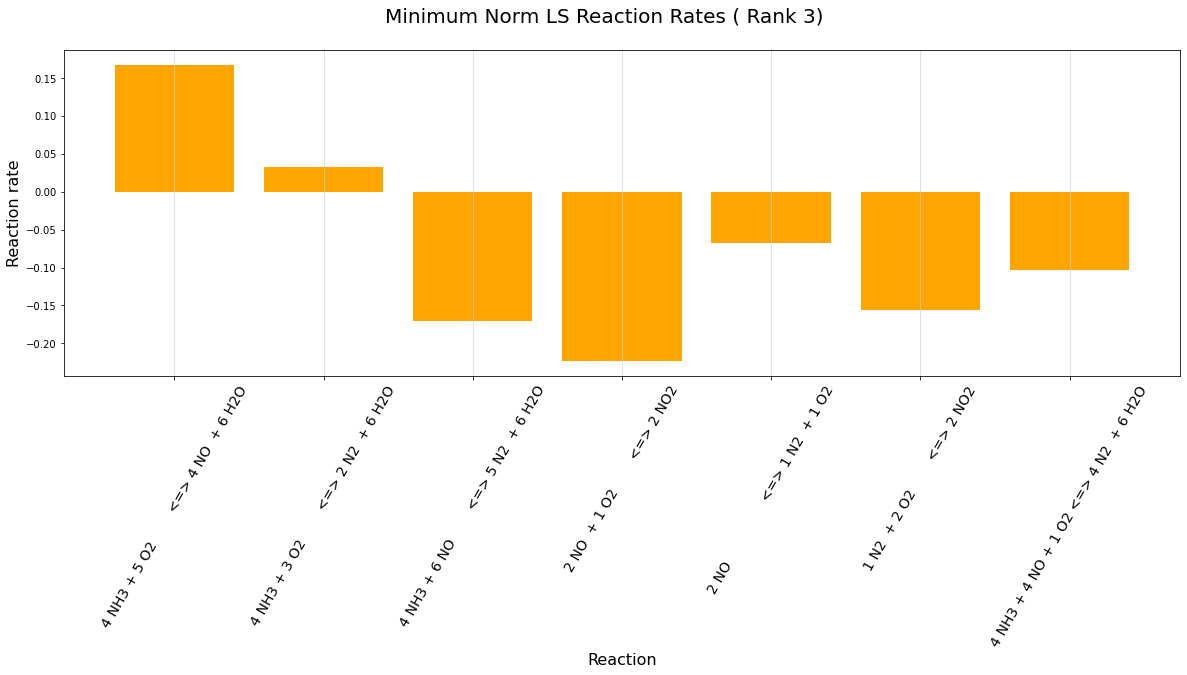

In [6]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(reactions)), r_vec, color='orange')
plt.xticks(range(len(reactions)),reactions,rotation=60,fontsize=14)
ax.set_ylabel('Reaction rate',fontsize=16)
ax.set_xlabel('Reaction',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates ( Rank %s)'%str(s_rank),fontsize=20)
plt.show()

## [Full-Rank Reaction Mechanism](#toc)<a id="fullrankrxnmech"></a>

In [7]:
'''Read a reaction mechanism and create data structures'''

# build the stoichiometric matrix
try:    
    from chen_3170.toolkit import reaction_mechanism   
except ModuleNotFoundError:
    assert False, 'You need to provide your own reaction_mechanism function here. Bailing out.'

(species, reactions, stoic_mtrx, _, _) = reaction_mechanism('data/methane-catalyst-rxn.txt')

print(species)
print('# of species =',len(species))
print('')
from chen_3170.help import print_reactions

print_reactions(reactions)

['CH3(s)', 'CH4(g)', 'H2O(g)', 'CH(s)', 'S', 'H(s)', 'C(s)', 'CO(g)', 'O(s)', 'CO(s)', 'CH2(s)', 'H2(g)']
# of species = 12

r0 :  CO(g)  + S     <=> CO(s)
r1 :  CO(s)  + S     <=> C(s)   + O(s)
r2 :  O(s)   + H2(g) <=> H2O(g) + S
r3 :  H2(g)  + 2 S   <=> 2 H(s)
r4 :  C(s)   + H(s)  <=> CH(s)  + S
r5 :  CH(s)  + H(s)  <=> CH2(s) + S
r6 :  CH2(s) + H(s)  <=> CH3(s) + S
r7 :  CH3(s) + H(s)  <=> CH4(g) + 2 S
n_reactions = 8


matrix shape = (8, 12)


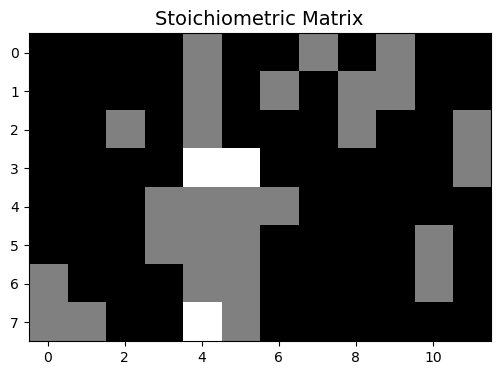

stoic_mtrx=
 [[ 0.  0.  0.  0. -1.  0.  0. -1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0. -2.  2.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  1.  1. -1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1. -1.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  1. -1.  0.  0.  0.  0. -1.  0.]
 [-1.  1.  0.  0.  2. -1.  0.  0.  0.  0.  0.  0.]]

mole balance vector =
 [-1.  0.  0. -1.  0.  0.  0.  1.]


In [8]:
'''Check the stoichiometric matrix'''

from chen_3170.help import plot_matrix

plot_matrix(stoic_mtrx, title='Stoichiometric Matrix')
print('stoic_mtrx=\n',stoic_mtrx)
print('')
print('mole balance vector =\n', stoic_mtrx.sum(1))

In [9]:
'''Rank of S'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

s_rank = matrix_rank(stoic_mtrx)
print('S shape   = ',stoic_mtrx.shape)
print('Rank of S = ',s_rank)
if s_rank == min(stoic_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')

S shape   =  (8, 12)
Rank of S =  8
Matrix is full rank.


## [Full-Rank Minimum Norm (shortest) Least-Squares Reaction Rate Solution](#toc)<a id="fullrankmnls"></a>

In [10]:
'''Assume a species production rate as random'''

import numpy as np
a = -1.8
b =  2.1
g_vec = (b-a)*np.random.random(len(species)) + a

In [11]:
'''Compute the MNLS reaction rates for a given species production rates'''

import numpy as np

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'
    
from chen_3170.help import forward_solve
try:    
    from chen_3170.toolkit import backward_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2,-6,10)

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)

r_vec_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    a_mtrx = stoic_mtrx @ stoic_mtrx.transpose() + epsilon * np.eye(len(reactions)) # A = S ST + epsilon I, A is the normal matrix
    b_vec  = stoic_mtrx @ g_vec                    # b = S g

    # matrix LU factorization of A, the normal matrix
    (L,U,P,a_rank) = lu_factorization( a_mtrx, pivoting_option='partial' ) # matrix is full rank; partial pivoting works
    
    assert a_rank == np.linalg.matrix_rank(a_mtrx)

    # solve the LS problem: A x = b
    y_vec = forward_solve( L, P @ b_vec)   # L y = P b
    x_vec = backward_solve( U, y_vec)      # U x = y

    # test my solution against NumPy solve
    assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-8

    r_vec = x_vec # r = x
    print('reaction rates r_vec =',[round(r,4) for r in list(r_vec)])

    rate_norm = np.linalg.norm(r_vec)
    print('||r|| = %8.5e'%rate_norm)
    
    r_vec_norm_history.append( rate_norm ) # save for plotting

    residual_vec = g_vec - stoic_mtrx.transpose() @ r_vec
    print('||g - ST r||^2 + eps*||r||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*rate_norm**2))
    print('||g - ST r|| +       ||r||   = %8.5e'%(np.linalg.norm(residual_vec) + rate_norm))
    print('||g - ST r||                 = %8.5e'%(np.linalg.norm(residual_vec)))


epsilon = 1.0e+02

reaction rates r_vec = [0.006, -0.0294, 0.0167, -0.0049, 0.0187, 0.0176, -0.0145, 0.0153]
||r|| = 4.80340e-02
||g - ST r||^2 + eps*||r||^2 = 1.11749e+01
||g - ST r|| +       ||r||   = 3.35624e+00
||g - ST r||                 = 3.30820e+00

epsilon = 1.3e+01

reaction rates r_vec = [0.0501, -0.1613, 0.082, 0.0093, 0.1012, 0.0959, -0.1143, 0.0571]
||r|| = 2.66651e-01
||g - ST r||^2 + eps*||r||^2 = 1.00882e+01
||g - ST r|| +       ||r||   = 3.29484e+00
||g - ST r||                 = 3.02819e+00

epsilon = 1.7e+00

reaction rates r_vec = [0.1826, -0.409, 0.1658, 0.1218, 0.372, 0.3378, -0.4361, 0.0601]
||r|| = 8.30222e-01
||g - ST r||^2 + eps*||r||^2 = 7.69063e+00
||g - ST r|| +       ||r||   = 3.38773e+00
||g - ST r||                 = 2.55751e+00

epsilon = 2.2e-01

reaction rates r_vec = [0.2669, -0.4665, 0.1769, 0.2903, 0.7067, 0.6159, -0.6259, 0.0144]
||r|| = 1.29432e+00
||g - ST r||^2 + eps*||r||^2 = 6.16671e+00
||g - ST r|| +       ||r||   = 3.70384e+00
||g - ST r

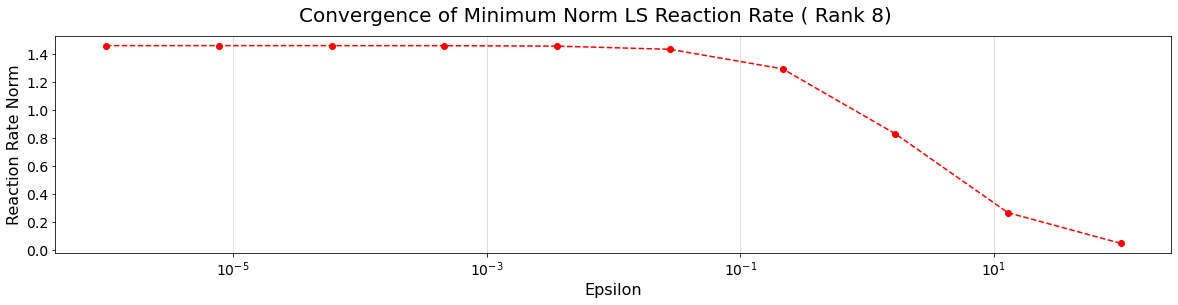

In [12]:
'''Plot Convergence of the Shortest Least-Square Reaction Rate'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,4))
ax.semilogx(epsilon_values, r_vec_norm_history,'ro--')
ax.set_ylabel('Reaction Rate Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Convergence of Minimum Norm LS Reaction Rate ( Rank %s)'%str(s_rank),fontsize=20)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

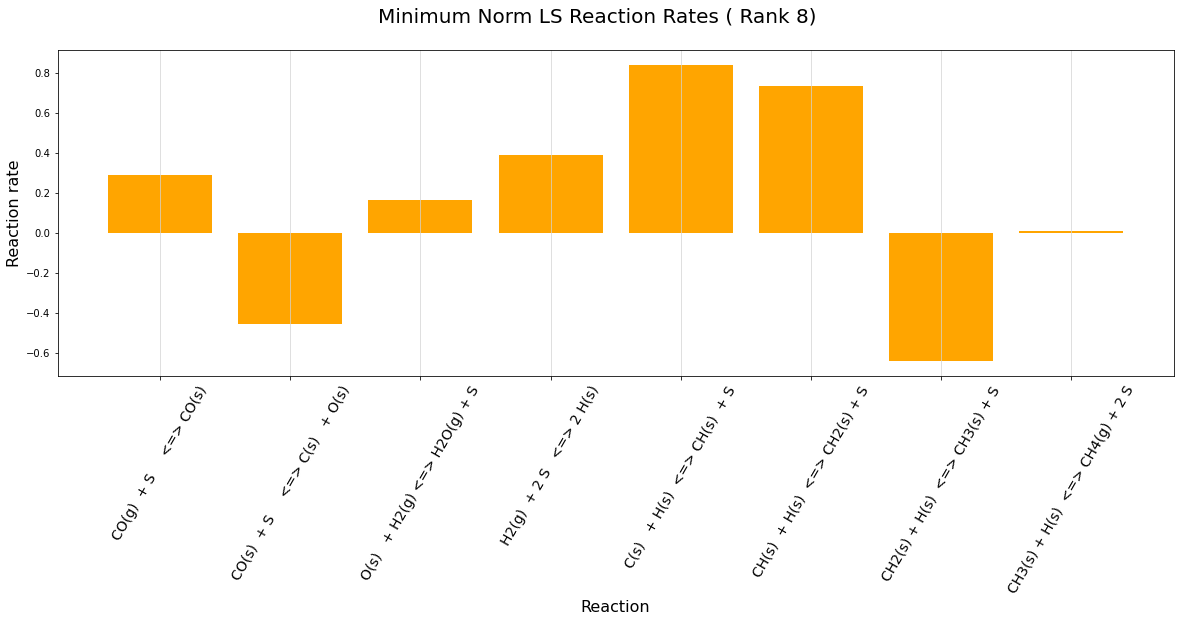

In [13]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(reactions)), r_vec, color='orange')
plt.xticks(range(len(reactions)),reactions,rotation=60,fontsize=14)
ax.set_ylabel('Reaction rate',fontsize=16)
ax.set_xlabel('Reaction',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates ( Rank %s)'%str(s_rank),fontsize=20)
plt.show()